# ECE 276C: Robot Manipulation and Control

# Assignment 2: Dynamics and Force Control

### Solution for Question 1 ###

##### The image of the manipulator with the torques and forces that act on the body is shown below:

![alt text](Q1_Image.jpg "Title")

In [1]:
import numpy as np
import sympy as smpy
import spatialmath.base as smb
from roboticstoolbox import *
from spatialmath import SE3
import matplotlib.pyplot as plt

In [2]:
# Get Transformation matrix.
def get_DH_T(alpha, a, theta, d):
    '''
    returns the DH transformation of the given matrix.
    :param alpha: rotation along x axis
    :param a: translation along x-axis
    :param theta: rotation along z-axis
    :param d: translation along z-axis
    :returns np.array: An array of the given transformation matrix.
    '''

#     H = np.matrix( [[ smpy.cos(theta), -smpy.sin(theta), 0, a ],
#                     [ smpy.sin(theta)*smpy.cos(alpha), smpy.cos(theta)*smpy.cos(alpha), -smpy.sin(alpha), -smpy.sin(alpha)*d ],
#                     [ smpy.sin(theta)*smpy.sin(alpha), smpy.cos(theta)*smpy.sin(alpha), smpy.cos(alpha), smpy.cos(alpha)*d ],
#                     [ 0, 0, 0, 1]])
    
    H = np.matrix( [[smpy.cos(theta), -smpy.sin(theta)*smpy.cos(alpha), smpy.sin(theta)*smpy.sin(alpha), a*smpy.cos(theta) ],
                    [smpy.sin(theta), smpy.cos(theta)*smpy.cos(alpha), -smpy.cos(theta)*smpy.sin(alpha), -a*smpy.sin(theta) ],
                    [0, smpy.sin(alpha), smpy.cos(alpha), d ],
                    [0, 0, 0, 1 ]])

    return smpy.Matrix(H)

In [3]:
li_1    = smb.symbolic.symbol('l_i-1')
li      = smb.symbolic.symbol('l_i')
qi      = smb.symbolic.symbol('q_i')

# Variables for the 3 DOF robot
q_list      = smb.symbolic.symbol('q_:3')
l_list      = smb.symbolic.symbol('l_:3')
t           = smb.symbolic.symbol('t')
q_t_list    = [smpy.Function(q)(t) for q in q_list]
q_list      = q_t_list

In [4]:
# Get the DH matrix of all links
# T_0_1   = get_DH_T(alpha=0, a=0, theta=q_list[0], d=l_list[0])
T_1_2   = get_DH_T(alpha=-np.pi/2, a=0, theta=q_list[0], d=l_list[0])
T_2_3   = get_DH_T(alpha=0, a=l_list[1], theta=q_list[1], d=0)
T_3_4   = get_DH_T(alpha=0, a=l_list[2], theta=q_list[2], d=0)

In [5]:
# T_1_2   = get_DH_T(alpha=0, a=0, theta=0, d=0)
# T_2_3   = get_DH_T(alpha=-np.pi/2, a=0.2, theta=0, d=0)
# T_3_4   = get_DH_T(alpha=-np.pi/2, a=0.2, theta=0, d=0)

In [6]:
T_1_4   = smpy.simplify(T_1_2 @ T_2_3 @ T_3_4)

In [7]:
# Get the transformation matrix till the mid-point
T_1_C1 = get_DH_T(alpha=-np.pi/2, a=0, theta=q_list[0], d=l_list[0]/2)
T_2_C2 = get_DH_T(alpha=0, a=l_list[1]/2, theta=q_list[1], d=0)
T_3_C3 = get_DH_T(alpha=0, a=l_list[2]/2, theta=q_list[2], d=0)

In [8]:
v1 = smpy.diff(T_1_C1[:3, 3], t)
v1

Matrix([
[0],
[0],
[0]])

In [9]:
v2 = smpy.simplify(smpy.nsimplify(smpy.diff((T_1_2 @ T_2_C2)[:3, 3], t), tolerance = 1e-5, rational = True ) )
v2

Matrix([
[-l_1*(sin(q_0(t))*cos(q_1(t))*Derivative(q_0(t), t) + sin(q_1(t))*cos(q_0(t))*Derivative(q_1(t), t))/2],
[l_1*(-sin(q_0(t))*sin(q_1(t))*Derivative(q_1(t), t) + cos(q_0(t))*cos(q_1(t))*Derivative(q_0(t), t))/2],
[                                                               l_1*cos(q_1(t))*Derivative(q_1(t), t)/2]])

In [10]:
v3 = smpy.simplify(smpy.nsimplify(smpy.diff((T_1_2 @ T_2_3 @ T_3_C3)[:3, 3], t), tolerance = 1e-5, rational = True ) )
v3

Matrix([
[-l_1*sin(q_0(t))*cos(q_1(t))*Derivative(q_0(t), t) - l_1*sin(q_1(t))*cos(q_0(t))*Derivative(q_1(t), t) - l_2*sin(q_1(t) - q_2(t))*cos(q_0(t))*Derivative(q_1(t), t)/2 + l_2*sin(q_1(t) - q_2(t))*cos(q_0(t))*Derivative(q_2(t), t)/2 - l_2*sin(q_0(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), t)/2],
[-l_1*sin(q_0(t))*sin(q_1(t))*Derivative(q_1(t), t) + l_1*cos(q_0(t))*cos(q_1(t))*Derivative(q_0(t), t) - l_2*sin(q_1(t) - q_2(t))*sin(q_0(t))*Derivative(q_1(t), t)/2 + l_2*sin(q_1(t) - q_2(t))*sin(q_0(t))*Derivative(q_2(t), t)/2 + l_2*cos(q_1(t) - q_2(t))*cos(q_0(t))*Derivative(q_0(t), t)/2],
[                                                                                                                                                        l_1*cos(q_1(t))*Derivative(q_1(t), t) - l_2*cos(q_1(t) - q_2(t))*Derivative(q_1(t), t)/2 + l_2*cos(q_1(t) - q_2(t))*Derivative(q_2(t), t)/2]])

In [11]:
dp_dt = smpy.simplify(smpy.nsimplify(smpy.diff(T_1_4[:3, 3], t), tolerance = 1e-5, rational = True ) )
dp_dt

Matrix([
[-l_1*sin(q_0(t))*cos(q_1(t))*Derivative(q_0(t), t) - l_1*sin(q_1(t))*cos(q_0(t))*Derivative(q_1(t), t) - l_2*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*sin(q_1(t) - q_2(t))*cos(q_0(t)) - l_2*sin(q_0(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), t)],
[-l_1*sin(q_0(t))*sin(q_1(t))*Derivative(q_1(t), t) + l_1*cos(q_0(t))*cos(q_1(t))*Derivative(q_0(t), t) - l_2*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*sin(q_1(t) - q_2(t))*sin(q_0(t)) + l_2*cos(q_1(t) - q_2(t))*cos(q_0(t))*Derivative(q_0(t), t)],
[                                                                                                                                          l_1*cos(q_1(t))*Derivative(q_1(t), t) - l_2*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*cos(q_1(t) - q_2(t))]])

In [12]:
rho = smb.symbolic.symbol('rho')
(m1, m2, m3, r1, r2, r3) = smpy.symbols('m1, m2, m3, r1, r2, r3', real = True)

m1 = rho * np.pi * l_list[0] * r1**2
m2 = rho * np.pi * l_list[1] * r2**2
m3 = rho * np.pi * l_list[2] * r3**2

def calculateInertia(_m, _r, _l, _axis):
    
    if _axis == 'x':
        I = 0.5 * _m * _r**2
    
    else:
        I = (_m * _r**2 * (1/4)) + (_m * _l**2 * (1/12))
    
    return I

I1 = np.zeros((3,3))
I2 = np.array([ [calculateInertia(m2, r2, l_list[1], 'x'), 0, 0],
                [0, calculateInertia(m2, r2, l_list[1], 'y'), 0],
                [0, 0, calculateInertia(m2, r2, l_list[1], 'z')] ])

I3 = np.array([ [calculateInertia(m3, r3, l_list[2], 'x'), 0, 0],
                [0, calculateInertia(m3, r3, l_list[2], 'y'), 0],
                [0, 0, calculateInertia(m3, r3, l_list[2], 'z')] ])

w1 = smpy.Matrix([[0], [0], [smpy.diff(q_list[0],t)]])
w2 = smpy.Matrix([[0], [0], [smpy.diff(q_list[1],t)]])
w3 = smpy.Matrix([[0], [0], [smpy.diff(q_list[2],t)]])

In [13]:
# Kinetic energy

KE1 = 0.5 * ( (m1 * v1.T @ v1) + (w1.T @ I1 @ w1) )
KE2 = 0.5 * ( (m2 * v2.T @ v2) + (w2.T @ I2 @ w2) )
KE3 = 0.5 * ( (m3 * v3.T @ v3) + (w3.T @ I3 @ w3) )

KE = smpy.simplify(smpy.nsimplify(KE1 + KE2 + KE3, tolerance = 1e-5, rational = True ) )
KE

Matrix([[rho*(15561260718*l_1**3*r2**2*cos(q_1(t))**2*Derivative(q_0(t), t)**2 + 20748347624*l_1**3*r2**2*Derivative(q_1(t), t)**2 + 62245042860*l_1**2*l_2*r3**2*cos(q_1(t))**2*Derivative(q_0(t), t)**2 + 62245042860*l_1**2*l_2*r3**2*Derivative(q_1(t), t)**2 + 124490085720*l_1*l_2**2*r3**2*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), t)**2 - 124490085720*l_1*l_2**2*r3**2*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), t)*Derivative(q_2(t), t) + 62245042860*l_1*l_2**2*r3**2*cos(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_0(t), t)**2 - 62245042860*l_1*l_2**2*r3**2*cos(q_2(t))*Derivative(q_1(t), t)**2 + 62245042860*l_1*l_2**2*r3**2*cos(q_2(t))*Derivative(q_1(t), t)*Derivative(q_2(t), t) + 15561260718*l_1*r2**4*Derivative(q_1(t), t)**2 + 31122521430*l_2**3*r3**2*sin(q_1(t))*sin(q_2(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), t)**2 + 15561260715*l_2**3*r3**2*cos(q_1(t))**2*Derivative(q_0(t), t)**2 + 15561260715*l_2**3*r3**2*cos(q_2(t))**2*Derivative(q_0(t), t)**2 - 15561260715*l_2**

In [14]:
# Potential energy

g = smpy.Matrix([[0], [0], [-9.81]])
PE1 = -m1 * g.T @ T_1_C1[:3, 3]
PE2 = -m2 * g.T @ (T_1_2 @ T_2_C2)[:3, 3]
PE3 = -m3 * g.T @ (T_1_2 @ T_2_3 @ T_3_C3)[:3, 3]
PE  = PE1 + PE2 + PE3
PE

Matrix([[15.4095119658579*l_0**2*r1**2*rho + 30.8190239317159*l_1*r2**2*rho*(l_0 + 0.5*l_1*sin(q_1(t))) + 30.8190239317159*l_2*r3**2*rho*(l_0 + 1.0*l_1*sin(q_1(t)) - 0.5*l_2*sin(q_1(t))*cos(q_2(t)) + 0.5*l_2*sin(q_2(t))*cos(q_1(t)))]])

In [15]:
# Define the Lagrangian

L = smpy.simplify(KE - PE)
L

Matrix([[rho*(-610623870509.862*l_0**2*r1**2 + 15561260718*l_1**3*r2**2*cos(q_1(t))**2*Derivative(q_0(t), t)**2 + 20748347624*l_1**3*r2**2*Derivative(q_1(t), t)**2 + 62245042860*l_1**2*l_2*r3**2*cos(q_1(t))**2*Derivative(q_0(t), t)**2 + 62245042860*l_1**2*l_2*r3**2*Derivative(q_1(t), t)**2 + 124490085720*l_1*l_2**2*r3**2*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), t)**2 - 124490085720*l_1*l_2**2*r3**2*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), t)*Derivative(q_2(t), t) + 62245042860*l_1*l_2**2*r3**2*cos(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_0(t), t)**2 - 62245042860*l_1*l_2**2*r3**2*cos(q_2(t))*Derivative(q_1(t), t)**2 + 62245042860*l_1*l_2**2*r3**2*cos(q_2(t))*Derivative(q_1(t), t)*Derivative(q_2(t), t) + 15561260718*l_1*r2**4*Derivative(q_1(t), t)**2 - 1221247741019.72*l_1*r2**2*(l_0 + 0.5*l_1*sin(q_1(t))) + 31122521430*l_2**3*r3**2*sin(q_1(t))*sin(q_2(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), t)**2 + 15561260715*l_2**3*r3**2*cos(q_1(t))**2*Derivative(q_0(t), t)

### Solution for Question 1 & 2 ###

In [16]:
L = L.subs([(rho, 1e4), (r1, 0.1), (r2, 0.02), (r3, 0.02), (l_list[0], 0), (l_list[1], 0.2), (l_list[2], 0.2)])
L

Matrix([[0.100530964906104*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), t)**2 - 0.100530964906104*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), t)*Derivative(q_2(t), t) + 2.46552191453727*sin(q_1(t) - q_2(t)) + 0.0251327412265261*sin(q_1(t))*sin(q_2(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), t)**2 - 7.39656574361181*sin(q_1(t)) + 0.0502654824530522*cos(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_0(t), t)**2 + 0.075398223682001*cos(q_1(t))**2*Derivative(q_0(t), t)**2 + 0.0125663706132631*cos(q_2(t))**2*Derivative(q_0(t), t)**2 - 0.0502654824530522*cos(q_2(t))*Derivative(q_1(t), t)**2 + 0.0502654824530522*cos(q_2(t))*Derivative(q_1(t), t)*Derivative(q_2(t), t) - 0.0125663706132631*Derivative(q_0(t), t)**2 + 0.0797126775933864*Derivative(q_1(t), t)**2 - 0.0251327412265261*Derivative(q_1(t), t)*Derivative(q_2(t), t) + 0.0168808245246485*Derivative(q_2(t), t)**2]])

In [17]:
from sympy import *

EOM1 = nsimplify(diff( diff(L, Derivative(q_list[0], t)), t) - diff(L, q_list[0]))
EOM1

Matrix([[-251327412265261*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*sin(q_1(t) - q_2(t))*sin(q_1(t))*sin(q_2(t))*Derivative(q_0(t), t)/5000000000000000 - 12566370613263*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*sin(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_0(t), t)/125000000000000 + 251327412265261*sin(q_1(t))*sin(q_2(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), (t, 2))/5000000000000000 + 251327412265261*sin(q_1(t))*cos(q_1(t) - q_2(t))*cos(q_2(t))*Derivative(q_0(t), t)*Derivative(q_2(t), t)/5000000000000000 - 12566370613263*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), t)*Derivative(q_1(t), t)/125000000000000 - 75398223682001*sin(q_1(t))*cos(q_1(t))*Derivative(q_0(t), t)*Derivative(q_1(t), t)/250000000000000 + 251327412265261*sin(q_2(t))*cos(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_0(t), t)*Derivative(q_1(t), t)/5000000000000000 - 251327412265261*sin(q_2(t))*cos(q_2(t))*Derivative(q_0(t), t)*Derivative(q_2(t), t)/5000000000000000 + 12566370613263*cos(q_1(t) - q_2(t))

In [18]:
EOM2 = nsimplify(diff( diff(L, Derivative(q_list[1], t)), t) - diff(L, q_list[1]))
EOM2

Matrix([[201061929812209*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_1(t), t)/1000000000000000 - 12566370613263*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_2(t), t)/125000000000000 + 251327412265261*sin(q_1(t) - q_2(t))*sin(q_1(t))*sin(q_2(t))*Derivative(q_0(t), t)**2/10000000000000000 + 201061929812209*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), (t, 2))/1000000000000000 - 12566370613263*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_2(t), (t, 2))/125000000000000 + 251327412265261*sin(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_0(t), t)**2/5000000000000000 + 12566370613263*sin(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_1(t), t)**2/125000000000000 + 251327412265261*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_0(t), t)**2/5000000000000000 - 12566370613263*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_1(t), t)**2/125000000000000 + 12566370613263*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivat

In [19]:
EOM3 = nsimplify(diff( diff(L, Derivative(q_list[2], t)), t) - diff(L, q_list[2]))
EOM3

Matrix([[-12566370613263*(Derivative(q_1(t), t) - Derivative(q_2(t), t))*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_1(t), t)/125000000000000 - 251327412265261*sin(q_1(t) - q_2(t))*sin(q_1(t))*sin(q_2(t))*Derivative(q_0(t), t)**2/10000000000000000 - 12566370613263*sin(q_1(t) - q_2(t))*sin(q_1(t))*Derivative(q_1(t), (t, 2))/125000000000000 - 251327412265261*sin(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_0(t), t)**2/5000000000000000 - 12566370613263*sin(q_1(t) - q_2(t))*cos(q_1(t))*Derivative(q_1(t), t)**2/125000000000000 - 251327412265261*sin(q_1(t))*cos(q_1(t) - q_2(t))*cos(q_2(t))*Derivative(q_0(t), t)**2/10000000000000000 + 12566370613263*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_1(t), t)**2/125000000000000 - 12566370613263*sin(q_1(t))*cos(q_1(t) - q_2(t))*Derivative(q_1(t), t)*Derivative(q_2(t), t)/125000000000000 + 251327412265261*sin(q_2(t))*cos(q_2(t))*Derivative(q_0(t), t)**2/10000000000000000 - 251327412265261*sin(q_2(t))*Derivative(q_1(t), t)**2/5000000000000000 + 2465521

In [38]:
# Inertia matrix
inertia = symarray('', (3,3))

inertia[0,0] = EOM1.expand().coeff(Derivative(q_list[0], t, t))
inertia[0,1] = EOM1.expand().coeff(Derivative(q_list[1], t, t))
inertia[0,2] = EOM1.expand().coeff(Derivative(q_list[2], t, t))

inertia[1,0] = EOM2.expand().coeff(Derivative(q_list[0], t, t))
inertia[1,1] = EOM2.expand().coeff(Derivative(q_list[1], t, t))
inertia[1,2] = EOM2.expand().coeff(Derivative(q_list[2], t, t))

inertia[2,0] = EOM3.expand().coeff(Derivative(q_list[0], t, t))
inertia[2,1] = EOM3.expand().coeff(Derivative(q_list[1], t, t))
inertia[2,2] = EOM3.expand().coeff(Derivative(q_list[2], t, t))

inertia = Matrix(inertia)

In [ ]:
# Coriolis matrix

EOM1_leftover = EOM1.expand() - (inertia[0,:]*Matrix([[Derivative(q_list[0], t, t)],[Derivative(q_list[1], t, t)],[Derivative(q_list[2], t, t)]]))[0]
EOM2_leftover = EOM2.expand() - (inertia[1,:]*Matrix([[Derivative(q_list[0], t, t)],[Derivative(q_list[1], t, t)],[Derivative(q_list[2], t, t)]]))[0]
EOM3_leftover = EOM3.expand() - (inertia[2,:]*Matrix([[Derivative(q_list[0], t, t)],[Derivative(q_list[1], t, t)],[Derivative(q_list[2], t, t)]]))[0]

CM = smpy.symarray('',(3,3))

CM[0,0] = EOM1_leftover.expand().coeff(Derivative(q_list[0],t)) + EOM1_leftover.expand().coeff(Derivative(q_list[0],t)**2)*Derivative(q_list[0],t)
EOM1_leftover = simplify(EOM1_leftover - CM[0,0]*Derivative(q_list[0],t))

CM[0,1] = EOM1_leftover.expand().coeff(Derivative(q_list[1],t)) + EOM1_leftover.expand().coeff(Derivative(q_list[1],t)**2)*Derivative(q_list[1],t)
EOM1_leftover = simplify(EOM1_leftover - CM[0,1]*Derivative(q_list[1],t))

CM[0,2] = EOM1_leftover.expand().coeff(Derivative(q_list[2],t)) + EOM1_leftover.expand().coeff(Derivative(q_list[2],t)**2)*Derivative(q_list[2],t)
EOM1_leftover = simplify(EOM1_leftover - CM[0,1]*Derivative(q_list[2],t))

CM[1,0] = EOM2_leftover.expand().coeff(Derivative(q_list[0],t)) + EOM2_leftover.expand().coeff(Derivative(q_list[0],t)**2)*Derivative(q_list[0],t)
EOM2_leftover = simplify(EOM2_leftover - CM[1,0]*Derivative(q_list[0],t))

CM[1,1] = EOM2_leftover.expand().coeff(Derivative(q_list[1],t)) + EOM2_leftover.expand().coeff(Derivative(q_list[1],t)**2)*Derivative(q_list[1],t)
EOM2_leftover = simplify(EOM2_leftover - CM[1,1]*Derivative(q_list[1],t))

CM[1,1] = EOM2_leftover.expand().coeff(Derivative(q_list[2],t)) + EOM2_leftover.expand().coeff(Derivative(q_list[2],t)**2)*Derivative(q_list[2],t)
EOM2_leftover = simplify(EOM2_leftover - CM[1,1]*Derivative(q_list[2],t))

CM[2,0] = EOM3_leftover.expand().coeff(Derivative(q_list[0],t)) + EOM3_leftover.expand().coeff(Derivative(q_list[0],t)**2)*Derivative(q_list[0],t)
EOM3_leftover = simplify(EOM3_leftover - CM[1,0]*Derivative(q_list[0],t))

CM[2,1] = EOM3_leftover.expand().coeff(Derivative(q_list[1],t)) + EOM3_leftover.expand().coeff(Derivative(q_list[1],t)**2)*Derivative(q_list[1],t)
EOM3_leftover = simplify(EOM3_leftover - CM[1,1]*Derivative(q_list[1],t))

CM[2,1] = EOM3_leftover.expand().coeff(Derivative(q_list[2],t)) + EOM3_leftover.expand().coeff(Derivative(q_list[2],t)**2)*Derivative(q_list[2],t)
EOM3_leftover = simplify(EOM3_leftover - CM[1,1]*Derivative(q_list[2],t))

CM = Matrix(CM)


In [ ]:
# Gravity terms

GM = smpy.symarray('',(3,1))

GM[0,0] = EOM1_leftover
GM[1,0] = EOM2_leftover
GM[2,0] = EOM3_leftover

GM = Matrix(GM)

### Solution for Question 3 ###

In [20]:
# Define the lengths of the links
l1 = 0
l2 = 0.2
l3 = 0.2

# Define the radius of the links
r1 = 0.1
r2 = 0.02
r3 = 0.02

# Density
pho = 1e4

# Define the robot configurations
q1 = [0, 0, np.pi/2]
q2 = [np.pi/2, np.pi/2, np.pi/4]
q3 = [np.pi/3, np.pi/2, 0]

In [21]:
def calculateInertia(_m, _r, _l):
    Ixx = 0.5 * _m * _r**2
    Iyy = Izz = (_m * _r**2 * (1/4)) + (_m * _l**2 * (1/12))
    
    return [Ixx, Iyy, Izz]

In [22]:
# Set up the robot using DHRobot class

# Calculate masses of the links
m2    = np.pi * r2**2 * l2 * pho
m3    = np.pi * r3**2 * l3 * pho

# Calculate interia matrix of the links
I2    = calculateInertia(m2, r2, l2)
I3    = calculateInertia(m3, r3, l3)

robot = DHRobot([RevoluteDH(d = l1, a = 0, alpha = -np.pi/2, m = 0, I = [0,0,0]),
                RevoluteDH(d = 0, a = l2, alpha = 0, m = m2, I = I2),
                RevoluteDH(d = 0, a = l3, alpha = 0, m = m3, I = I3)], name = '3 DOF robot')

print('Torque to hold at q1: ', robot.rne(q1, [0,0,0], [0,0,0], [0,0,-9.81]))
print('Torque to hold at q2: ', robot.rne(q2, [0,0,0], [0,0,0], [0,0,-9.81]))
print('Torque to hold at q3: ', robot.rne(q3, [0,0,0], [0,0,0], [0,0,-9.81]))
      
# robot.plot(q1)

Torque to hold at q1:  [ 9.86076132e-32 -9.86208766e+00 -3.01939352e-16]
Torque to hold at q2:  [2.46519033e-32 3.48677453e+00 3.48677453e+00]
Torque to hold at q3:  [ 0.00000000e+00 -9.05818056e-16 -3.01939352e-16]


### Solution for Question 4 ###

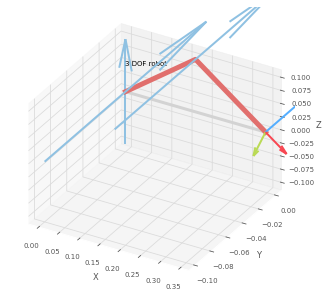

<Figure size 432x288 with 0 Axes>

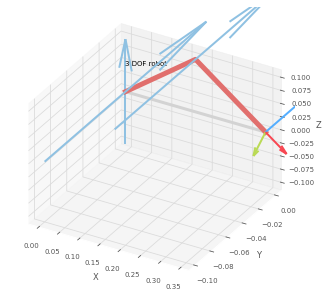

PyPlot3D backend, t = 0.44999999999999996, scene:
  3 DOF robot

<Figure size 432x288 with 0 Axes>

In [23]:
# Configuration for Q4
q4 = [0,-np.pi/6, np.pi/3]

def grav_comp(robot, t, q, qd):
    return robot.gravload(q, [0,0,-9.81])

# Plotting of robot without gravity compensation
t, q, qd = robot.fdyn(5, q4)
robot.plot(q, movie='robot_without_grav.gif')

# Plotting of robot with gravity compensation
t, q, qd = robot.fdyn(5, q4, grav_comp)
robot.plot(q, movie='robot_w_grav.gif')

### Solution for Question 5 ###

Torque values to hold at q4 before adding payload:  [  0.         -12.81122767  -4.27040922]
Torque values to hold at q4 after adding payload:  [  0.         -14.46526028  -5.09742553]


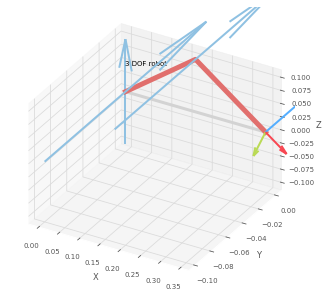

PyPlot3D backend, t = 0.44999999999999996, scene:
  3 DOF robot

<Figure size 432x288 with 0 Axes>

In [24]:
# Payload weight in end-effector
mass_payload = 3

print('Torque values to hold at q4 before adding payload: ', robot.gravload(q4, [0,0,-9.81]))
robot.payload(mass_payload, [0.0,0.0,0.0])
print('Torque values to hold at q4 after adding payload: ', robot.gravload(q4, [0,0,-9.81]))

t, q, qd = robot.fdyn(5, q4, grav_comp)
robot.plot(q, movie='robot_w_grav_w_payload.gif')

#### After the payload is added, there will be changes in the mass and inertia of the link. The center of mass of the link will shift as well. However, robot.payload function from the robotics toolbox used here will perform all of these changes in the dynamics of the robot. ####

### Solution for Question 6 ###

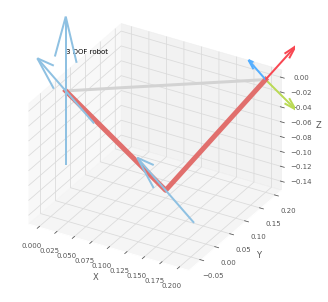

PyPlot3D backend, t = 2.000000000000001, scene:
  3 DOF robot

<Figure size 432x288 with 0 Axes>

In [25]:
def pd_controller(robot, t, q, qd, q_star, P, D):
    
    tau_1 = (q_star - q) * P + qd * D
    tau_2 = robot.gravload(q, [0,0,-9.81])
    return tau_1 + tau_2

# Variable definitions
locations       = []
joint_angles    = []

# Define the given four end-effector positions in cartesian space
p1   = [0.2, 0.2, 0]
p2   = [0.1, 0.2, 0]
p3   = [0.1, -0.2, 0]
p4   = [0.2, -0.2, 0]

# Define the joints for the given four end-effector positions
q_p1 = robot.ikine_LM(SE3(p1))[0]
q_p2 = robot.ikine_LM(SE3(p2))[0]
q_p3 = robot.ikine_LM(SE3(p3))[0]
q_p4 = robot.ikine_LM(SE3(p4))[0]

# Add the joints in the locations list
locations.append(q_p1)
locations.append(q_p2)
locations.append(q_p3)
locations.append(q_p4)
locations.append(q_p1)
locations.append(q_p1)

# Initialize joint_angles and ee_path
ee_path = np.asarray(p1[0:2])
joint_angles.append(q_p1)

# PD coefficients
P    = 0.005
D    = 0.001

for i in range(len(locations) - 1):
    start = locations[i]
    end   = locations[i+1]

    # Plotting of robot with gravity compensation
    t, q, qd = robot.fdyn(5, start, pd_controller, torque_args = {'q_star' : end, 'P' : P, 'D' : D})
    
    for _q in q:
        sol = robot.fkine(_q)
        ee_path = np.vstack((ee_path, np.asarray(sol)[0:2, 3]))
        joint_angles.append(_q)
    
robot.plot(np.asarray(joint_angles), movie='robot_q6.gif')

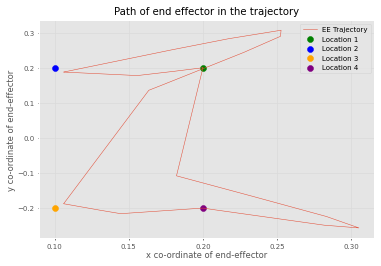

In [26]:
plt.plot(ee_path[:, 0], ee_path[:, 1])
plt.scatter(0.2, 0.2, color = 'g')
plt.scatter(0.1, 0.2, color = 'b')
plt.scatter(0.1, -0.2, color = 'orange')
plt.scatter(0.2, -0.2, color = 'purple')

plt.xlabel('x co-ordinate of end-effector')
plt.ylabel('y co-ordinate of end-effector')
plt.title('Path of end effector in the trajectory')
plt.legend(['EE Trajectory', 'Location 1', 'Location 2', 'Location 3', 'Location 4'])